# TA Administration

version: 2.0 , author: Robert Bulava, available at: https://github.com/robert-bulava

This notebook was created to help teaching assistants (TAs) at Peking University HSBC Graduate School (PHBS) with their administrative tasks. Each TA serves 10-80 students and is responsible for a number of data-processing tasks. These may include
taking attendance, assigning to working groups, collecting homework, marking homework and exams, collecting and evaluating peer assessment forms, data entry and calculating marks.

TAs can save 5-15 h of work by utilising the code and best practices provided in this notebook.

In addition, this notebook can significantly decrease the chance of making mistakes at various levels (e.g. data entry, processing, mark calculation).

#### Disclaimer:
The notebook is not authorised by the Peking University and was created out of my own interest.

The dataset used in this notebook has the same structure as worksheets generated at PHBS. Its content (student numbers, names, etc.) is created for demo purposes only and bears no resemblance with real students.

This notebook comes with no warranties of any kind. You can use this code at your own risk, only. 

The content is available under the MIT License. https://opensource.org/licenses/MIT

# Contents
1. [Loading Data](#loading_data)
2. [Generating Student Emails](#emails)
3. [Calculating Reduced IDs](#reduced_id)
4. [Group Arrangements](#group_arrangements)
5. [Attendance](#attendance)
    1. [Creating Attendance Sheet](#attendance_sheet)
    2. [Evaluating Attendance](#evaluating_attendance)
6. [Assessment Input](#assessment_input) 
7. [Calculating Weighted Marks](#weighted_marks) 

Importing modules

In [1]:
import openpyxl
import os
import pandas as pd
import numpy as np
import requests
from IPython.display import Image

## Loading Data <a name="loading_data"></a>

Choosing master folder. 

<b>Action:</b> After copying the TA Directory to your hard drive, please change the path in the cell below.

In [2]:
root_folder = r'P:\IT\Python\TA_Directory' 
os.chdir(root_folder)
os.getcwd()

'P:\\IT\\Python\\TA_Directory'

The structure of the Excel file provided by the student department is as follows:

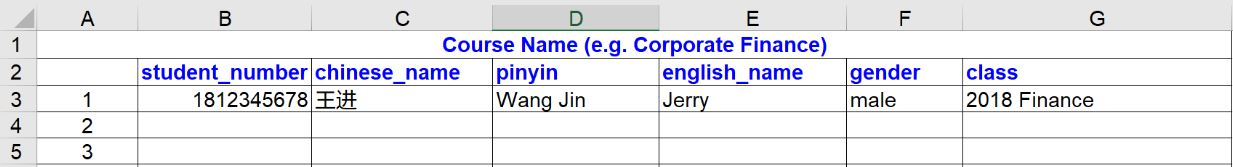

In [3]:
Image(filename='Nb_Images/worksheet_desc.jpg')

Loading the list of students.

In [4]:
students = pd.read_excel(r'Master\master_file_demo.xls', header=1, index_col=0)
students.head()

,student_number,chinese_name,pinyin,english_name,gender,class
1,1702321814,王龙,Long Wang,Lonnie,female,2017 Economics
2,1702321833,王小雨,Wang Xiaoyu,John,male,2017 Economics
3,1702321887,李萌萌,LI Mengmeng,Hannah,female,2017 Economics
4,1702321896,季小帅,LI XIAOSHUAI,NaN,female,2017 Management
5,1802321321,叶头头,Yetoutou,Dolores,female,2018 Finance


<b>Check:</b>

Is the number of students enrolled in the course equal to the following value?

In [5]:
len(students['student_number'].unique())

29

<b>Check: </b>

Returns rows with at least one `NaN`. Do these rows look alright?

In [6]:
students.loc[students.isnull().any(axis=1)]

,student_number,chinese_name,pinyin,english_name,gender,class
4,1702321896,季小帅,LI XIAOSHUAI,NaN,female,2017 Management
13,1802321543,树修理,shuxiuli,NaN,female,2018 Economics
20,1802321566,陆红花,Chen Honghua,NaN,female,2018 Quantitative Finance
21,1802321575,"WILLIAMS,Lucas",NaN,"WILLIAMS, Lucas",male,2018 Quantitative Finance
22,1802321576,"IVAN,Pavel",NaN,"IVAN, Pavel",male,2018 Finance
27,1902321534,"FERNANDEZ,Diego Aranga",NaN,"FERNANDEZ, Diego Aranga",male,2019 Management
28,1902321545,"AHMUT,Habib",NaN,"AHMUT, Habib",male,2019 Management
29,1902321555,王立辊,Ligun Wang,NaN,male,2019 Quantitative Finance


## Generating Student Emails <a name="emails"></a>

The syntax of email addresses of PHBS students is as follows:

student_number@sz.pku.edu.cn for 2017 cohort; 

student_number@pku.edu.cn for other cohorts.
   

Appending the <i>email</i> column:

In [7]:
students['email'] = np.where(students['student_number'].astype(str).str[:2] == '17',
                             students['student_number'].astype(
                                 str) + '@sz.pku.edu.cn',
                             students['student_number'].astype(
                                 str) + '@pku.edu.cn'
                             )

In [8]:
# students.head()

<b>Check:</b>

Do all the emails look alright?

In [9]:
students['email']

1     1702321814@sz.pku.edu.cn
2     1702321833@sz.pku.edu.cn
3     1702321887@sz.pku.edu.cn
4     1702321896@sz.pku.edu.cn
5        1802321321@pku.edu.cn
6        1802321500@pku.edu.cn
7        1802321503@pku.edu.cn
8        1802321504@pku.edu.cn
9        1802321507@pku.edu.cn
10       1802321521@pku.edu.cn
11       1802321522@pku.edu.cn
12       1802321525@pku.edu.cn
13       1802321543@pku.edu.cn
14       1802321544@pku.edu.cn
15       1802321547@pku.edu.cn
16       1802321548@pku.edu.cn
17       1802321553@pku.edu.cn
18       1802321558@pku.edu.cn
19       1802321565@pku.edu.cn
20       1802321566@pku.edu.cn
21       1802321575@pku.edu.cn
22       1802321576@pku.edu.cn
23       1802321598@pku.edu.cn
24       1802321833@pku.edu.cn
25       1902321507@pku.edu.cn
26       1902321533@pku.edu.cn
27       1902321534@pku.edu.cn
28       1902321545@pku.edu.cn
29       1902321555@pku.edu.cn
Name: email, dtype: object

Returns a mailing list for sending bulk emails. (copy & paste)

In [10]:
print(*students['email'], sep=', ')

1702321814@sz.pku.edu.cn, 1702321833@sz.pku.edu.cn, 1702321887@sz.pku.edu.cn, 1702321896@sz.pku.edu.cn, 1802321321@pku.edu.cn, 1802321500@pku.edu.cn, 1802321503@pku.edu.cn, 1802321504@pku.edu.cn, 1802321507@pku.edu.cn, 1802321521@pku.edu.cn, 1802321522@pku.edu.cn, 1802321525@pku.edu.cn, 1802321543@pku.edu.cn, 1802321544@pku.edu.cn, 1802321547@pku.edu.cn, 1802321548@pku.edu.cn, 1802321553@pku.edu.cn, 1802321558@pku.edu.cn, 1802321565@pku.edu.cn, 1802321566@pku.edu.cn, 1802321575@pku.edu.cn, 1802321576@pku.edu.cn, 1802321598@pku.edu.cn, 1802321833@pku.edu.cn, 1902321507@pku.edu.cn, 1902321533@pku.edu.cn, 1902321534@pku.edu.cn, 1902321545@pku.edu.cn, 1902321555@pku.edu.cn


## Calculating Reduced IDs <a name="reduced_id"></a>

Each student at PHBS is assigned a student number of 10 digits. Reduced student numbers (abbr. reduced IDs) can make the class management easier, e.g. in data entry. Let's find reduced IDs that are short and easily derivable from student numbers. 

First, we test if the last 2-4 digits of the student number are sufficient. If not, then taking first 1-3 digits and last 1-7 digits should provide a unique reduced ID. Usually, first 2 digits (denote the year of enrolment) and last 3 digits are sufficient for a unique representation of a student.

E.g. for student number 1702321814, these are 17 and 814, and the reduced ID is 17814.

<b>If you are a TA for more courses:</b>
Generated reduced ID uniquely represent a student only in a course for which it was generated. So, if you work as a TA for two or more courses, it may happen that a student can have reduced IDs of different lengths in different courses.

#### Defining Functions

In [11]:
def first_n_digits(column, n):
    if n == 0:
        return 0
    else:
        return column.astype(str).str[:n].astype(np.int64)


def last_n_digits(column, n):
    return column.astype(str).str[-n:].astype(np.int64)


def smallest_id(column, first_n, last_m):
    'returns pandas series with first_n and last_m digits concatenated'
    return (first_n_digits(column, first_n)*(10**last_m) + last_n_digits(column, last_m))

<b>Optional:</b> Uncomment to try out these functions.

In [12]:
# len(last_n_digits(students.student_number, 3))

In [13]:
# first_n_digits(students.student_number, 0)

In [14]:
# smallest_id(students.student_number, 2, 3)

In [15]:
def searching_reduced_id(column):
    '''
    Returns a tuple of two numbers, the first item is the number of first n digits needed 
    for the reduced id, the second item is the number of last m digits needed for the reduced id.
    '''
    # This algorithm was designed specifically for PHBS student number syntax. Other institutions may
    # need a slight modification of the code.

    # 1. take from 1 to 4 last digits and test if these represent a unique combination for each student,
    #    if fail, continue with 2
    for kk in range(1, 5):
        if len(column.unique()) == len(last_n_digits(column, kk).unique()):
            # print('Reduced id is the last',kk,'digits of the student number.')
            return (0, kk)

    # 2. take from 1 to 3 first digits and combine them with 1 to 8 last digits
    for jj in range(1, 4):
        for kk in range(1, 8):
            if len(column.unique()) == len(smallest_id(column, jj, kk).unique()):
                # print('Reduced id is the first', jj, 'digits and the last', kk, 'digits (concatenated).')
                return (jj, kk)
        else:
            continue
        break

#### Adding Reduced ID Column

This tuple shows how many digits positioned at the beginning and the end of the student number to use.

In [16]:
searching_reduced_id(students['student_number'])

(2, 3)

Let's assign these values to smallest_id function, and calculate and append <i>reduced_id</i> column to our dataframe.

In [17]:
students['reduced_id'] = smallest_id(students['student_number'],
                                     searching_reduced_id(
                                         students['student_number'])[0],
                                     searching_reduced_id(
                                         students['student_number'])[1]
                                     )

<b>Check:</b>
    
Are all the reduced IDs really unique?

In [18]:
len(students['reduced_id'].unique()) == len(students['student_number'])

True

You can inspect newly created column <i>reduced_id</i> below.

In [19]:
students.head()

,student_number,chinese_name,pinyin,english_name,gender,class,email,reduced_id
1,1702321814,王龙,Long Wang,Lonnie,female,2017 Economics,1702321814@sz.pku.edu.cn,17814
2,1702321833,王小雨,Wang Xiaoyu,John,male,2017 Economics,1702321833@sz.pku.edu.cn,17833
3,1702321887,李萌萌,LI Mengmeng,Hannah,female,2017 Economics,1702321887@sz.pku.edu.cn,17887
4,1702321896,季小帅,LI XIAOSHUAI,NaN,female,2017 Management,1702321896@sz.pku.edu.cn,17896
5,1802321321,叶头头,Yetoutou,Dolores,female,2018 Finance,1802321321@pku.edu.cn,18321


## Group Arrangements <a name="group_arrangements"></a>

TAs are often responsible for arranging students into groups. Here are a few options:
<ol>
    <li>Manually assign group IDs to students in Excel and upload it to this notebook.</li>
    <li>Send an assignment form to students, collect and process the group arrangement files.</li>
    <li>Assign students by random.</li>
</ol>

Note: Options 2 and 3 may be implemented in the future versions.

### 1) Manual assignment

Creating an Excel sheet for manual assignment. You can choose different columns or modify their order.

In [20]:
groups_to_print = students.loc[:, [
    'student_number', 'gender', 'chinese_name', 'reduced_id']]

Adding an empty column for the group ID. This could be a number (preferred) or a string.

In [21]:
groups_to_print['group_id'] = np.nan

In [22]:
# attendance_to_print.head()

Exporting the group worksheet.

In [23]:
groups_to_print.to_excel(
    r'Groups\Manual\Output\manual_groups_output_demo.xlsx')

<b>Action:</b> Fill in the sheet yourself or let the students write down their group ID during the class. Rename and save the Excel file to the '...\\Manual\\Input' folder.

Loading and merging the Excel file with the students dataframe.

In [24]:
# loads columns reduced_id and group_id and
groups = pd.read_excel(r'Groups\Manual\Input\manual_groups_input_demo.xlsx',
                       header=0, usecols=['reduced_id', 'group_id'])

In [25]:
students = pd.merge(
    students, groups[['reduced_id', 'group_id']], on='reduced_id', how='left')

<b>Check:</b> 

How many students have no group assigned? (Should equal zero.)

In [26]:
len(students['student_number']) - len(students['group_id'].isnull())

0

In [27]:
students.head()

,student_number,chinese_name,pinyin,english_name,gender,class,email,reduced_id,group_id
0,1702321814,王龙,Long Wang,Lonnie,female,2017 Economics,1702321814@sz.pku.edu.cn,17814,demo_group_1
1,1702321833,王小雨,Wang Xiaoyu,John,male,2017 Economics,1702321833@sz.pku.edu.cn,17833,demo_group_2
2,1702321887,李萌萌,LI Mengmeng,Hannah,female,2017 Economics,1702321887@sz.pku.edu.cn,17887,demo_group_3
3,1702321896,季小帅,LI XIAOSHUAI,NaN,female,2017 Management,1702321896@sz.pku.edu.cn,17896,demo_group_1
4,1802321321,叶头头,Yetoutou,Dolores,female,2018 Finance,1802321321@pku.edu.cn,18321,demo_group_4


## Attendance <a name="attendance"> </a>

### Creating Attendance Sheet <a name="attendance_sheet"></a>

Creating an Excel sheet for in-class signing. You can change columns or modify their order.

In [28]:
attendance_to_print = students.loc[:, [
    'student_number', 'gender', 'chinese_name', 'reduced_id']]

Adding an empty column for checking attendance.

In [29]:
attendance_to_print['present'] = np.nan

In [30]:
# attendance_to_print.head()

Exporting the attendance sheet.

In [31]:
attendance_to_print.to_excel(r'Attendance\empty_form.xlsx')

<b>Important:</b> 

Remember to write the date of the class to each of the attendance sheets.

### Evaluating Attendance <a name="evaluating_attendance"></a>

Create an Excel document with the following structure. Each column starts with the date and continues with reduced IDs of absent students. Here is an example of a course with 7 classes where at least one student was absent.

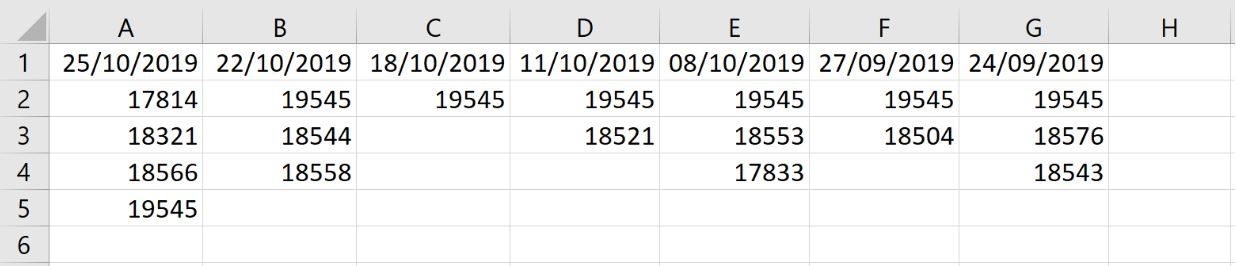

In [32]:
Image(filename='Nb_Images/attendance_desc.jpg')

Save this document as <i>attendance.xlsx</i> to '...\\Attendance'.

Loading the attendance sheet.

In [33]:
attendance = pd.read_excel(r'Attendance\attendance_demo.xlsx', header=0)
attendance.head()

,2019-10-25,2019-10-22,2019-10-18,2019-10-11,2019-10-08,2019-09-27,2019-09-24
0,17814,19545.0,19545.0,19545.0,19545.0,19545.0,19545.0
1,18321,18544.0,NaN,18521.0,18553.0,18504.0,18576.0
2,18566,18558.0,NaN,NaN,17833.0,NaN,18543.0
3,19545,NaN,NaN,NaN,NaN,NaN,NaN


Table of students (<i>reduced_id</i>) who missed at least one class.

In [34]:
missing_table = attendance.apply(pd.value_counts)
missing_table.index = missing_table.index.astype(int)
missing_table

,2019-10-25,2019-10-22,2019-10-18,2019-10-11,2019-10-08,2019-09-27,2019-09-24
17814,1.0,NaN,NaN,NaN,NaN,NaN,NaN
17833,NaN,NaN,NaN,NaN,1.0,NaN,NaN
18321,1.0,NaN,NaN,NaN,NaN,NaN,NaN
18504,NaN,NaN,NaN,NaN,NaN,1.0,NaN
18521,NaN,NaN,NaN,1.0,NaN,NaN,NaN
18543,NaN,NaN,NaN,NaN,NaN,NaN,1.0
18544,NaN,1.0,NaN,NaN,NaN,NaN,NaN
18553,NaN,NaN,NaN,NaN,1.0,NaN,NaN
18558,NaN,1.0,NaN,NaN,NaN,NaN,NaN
18566,1.0,NaN,NaN,NaN,NaN,NaN,NaN


Table of students and their frequency of absence.

In [35]:
missing_freq = attendance.apply(pd.value_counts).sum(axis=1).to_frame()
missing_freq.index = missing_freq.index.astype(int)
missing_freq.columns = ['absence_count']
missing_freq

,absence_count
17814,1.0
17833,1.0
18321,1.0
18504,1.0
18521,1.0
18543,1.0
18544,1.0
18553,1.0
18558,1.0
18566,1.0


Joining missing_freq dataframe with students dataframe.

In [36]:
students = pd.merge(students, missing_freq, left_on=[
                    'reduced_id'], right_on=missing_freq.index, how='left')

Replacing `NaN` in <i>absence_count</i> with zeros.

In [37]:
students['absence_count'].fillna(0, inplace=True)

In [38]:
students.head()

,student_number,chinese_name,pinyin,english_name,gender,class,email,reduced_id,group_id,absence_count
0,1702321814,王龙,Long Wang,Lonnie,female,2017 Economics,1702321814@sz.pku.edu.cn,17814,demo_group_1,1.0
1,1702321833,王小雨,Wang Xiaoyu,John,male,2017 Economics,1702321833@sz.pku.edu.cn,17833,demo_group_2,1.0
2,1702321887,李萌萌,LI Mengmeng,Hannah,female,2017 Economics,1702321887@sz.pku.edu.cn,17887,demo_group_3,0.0
3,1702321896,季小帅,LI XIAOSHUAI,NaN,female,2017 Management,1702321896@sz.pku.edu.cn,17896,demo_group_1,0.0
4,1802321321,叶头头,Yetoutou,Dolores,female,2018 Finance,1802321321@pku.edu.cn,18321,demo_group_4,1.0


<b>Check:</b>

Does students dataframe look alright?

In [39]:
students

,student_number,chinese_name,pinyin,english_name,gender,class,email,reduced_id,group_id,absence_count
0,1702321814,王龙,Long Wang,Lonnie,female,2017 Economics,1702321814@sz.pku.edu.cn,17814,demo_group_1,1.0
1,1702321833,王小雨,Wang Xiaoyu,John,male,2017 Economics,1702321833@sz.pku.edu.cn,17833,demo_group_2,1.0
2,1702321887,李萌萌,LI Mengmeng,Hannah,female,2017 Economics,1702321887@sz.pku.edu.cn,17887,demo_group_3,0.0
3,1702321896,季小帅,LI XIAOSHUAI,NaN,female,2017 Management,1702321896@sz.pku.edu.cn,17896,demo_group_1,0.0
4,1802321321,叶头头,Yetoutou,Dolores,female,2018 Finance,1802321321@pku.edu.cn,18321,demo_group_4,1.0
5,1802321500,梦真球,MENG Zhenqiu,Steven,male,2018 Economics,1802321500@pku.edu.cn,18500,demo_group_2,0.0
6,1802321503,宋心裂,Xinlie Song,Victor,male,2018 International Finance,1802321503@pku.edu.cn,18503,demo_group_5,0.0
7,1802321504,孙梦,SUN Meng,Anna,female,2018 Economics,1802321504@pku.edu.cn,18504,demo_group_3,1.0
8,1802321507,彭秀,pengxiu,Dennis,male,2018 Economics,1802321507@pku.edu.cn,18507,demo_group_1,0.0
9,1802321521,刘修类,LI Xiulei,Samuel,male,2018 Economics,1802321521@pku.edu.cn,18521,demo_group_2,1.0


## Assessment Input <a name="assessment_input"></a>

The procedure of creating and loading student marks sheet is identical for all types of assessment. E.g., for homework assignments, midterms, final exams, group project peer reviews.

Let's take assessment 1 as an example. First, we need to create the student mark sheet. An example is provided in '...\\Assessment_Input\\assignment1_demo.xlsx' .

#### 0) Filling in the mark sheet

Doing the following tasks step by step can save some time and reduce errors as you won't need to refocus, e.g. from marking to data entry.
Even though there is a double-check implemented, make sure that you pay extra attention to the process of data entry.

<ol>
<li>Mark the assignments/exams and write the reduced id with the mark on the top of the front page (of the hard copy).</li>

<li>Fill in the <i>mark_sheet_template.xlsx</i> as follows:</li>
    <ol>
    <li>Take the assignments one by one and write the <i>reduced_id</i> and <i>mark</i> in the first two columns. Put the assignments from one stack to another, so the last assignment of the first stack is now the first assignment of the second stack.</li>
    <li>When you finish, hide first and last two columns so you are not influenced by them. Repeat the process by writing the first assignment reduced id and mark at the bottom of <i>check_reduced_id</i> and <i>check_mark</i> columns. In other words, fill <i>check_reduced_id</i> and <i>check_mark</i> columns from bottom to top. Make sure that there are no missing values.</li>
  
  </ol>
    
<li>Unhide the first and last two columns. Check columns <i>diff1</i> and <i>diff2</i>. If there is a non-zero value in a row, then you need to find the corresponding assignment and submit the correct reduced id or mark.</li>

<li>Save the file in the same folder ('...\Assessment_Input') named accordingly, e.g. <i>assignment1.xlsx</i>, <i>midterm.xlsx</i>.</li>
</ol>

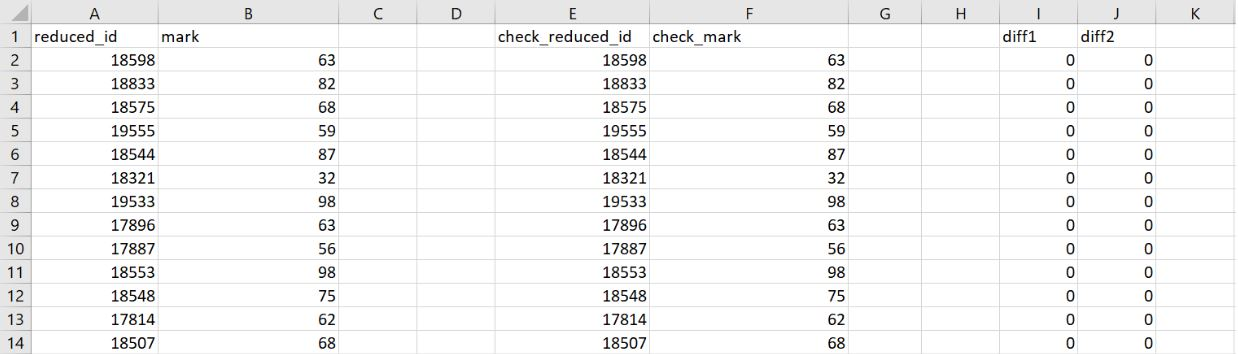

In [40]:
Image(filename='Nb_Images/marks_desc.jpg')

### Ex.: Assignment 1 

To repeat the process for other types of assessment (e.g. assignment 2, midterm, or final), simply do the following:

a) Copy the several following cells, including the check cells (<b>Check:</b>).

b) Change the title, e.g. Ex.: <b>Assignment1 &rarr; Midterm</b> .

c) Adjust the cells as described in comments starting with triple hashtag '###'.

Although this process could have been automated, copying and adjusting the cells manually will keep the assessment processing better organised.

#### 1) Loading the data and changing a column name

In [41]:
# loads ONLY FIRST TWO COLUMNS of the file since the rest serves as check columns
assignment1 = pd.read_excel(
    r'Assessment_Input\assignment1_demo.xlsx', header=0, usecols=range(2))
### change variable name and modify the location of the file

In [42]:
assignment1.rename(columns={'mark':'a1_mark_demo'}, inplace=True)
### change variable and rename a1_marks_demo as needed, e.g. midterm_marks

In [43]:
assignment1

,reduced_id,a1_mark_demo
0,18598,63
1,18833,82
2,18575,68
3,19555,59
4,18544,87
5,18321,32
6,19533,98
7,17896,63
8,17887,56
9,18553,98


<b>Check:</b> 

Does the assignment dataframe contain any `NaN` values?

In [44]:
assignment1.isnull().values.any()
### change assignment1 as needed

False

<b>Check:</b> 

Is the number of marks equal to the number of students?

In [45]:
sum(assignment1.iloc[:, 1].notnull()) == len(students)
### change assignment1 as needed

True

<b>Check:</b> 

Is there only one mark entry per student? 

In [46]:
len(assignment1['reduced_id'].unique()) == len(assignment1)
### change assignment1 as needed

True

#### 2) Merging the mark sheet with students dataframe

In [47]:
students = pd.merge(
    students, assignment1[['reduced_id', 'a1_mark_demo']], on='reduced_id', how='outer')
### change a1_marks_demo to what you decided before

In [48]:
students.head()

,student_number,chinese_name,pinyin,english_name,gender,class,email,reduced_id,group_id,absence_count,a1_mark_demo
0,1702321814,王龙,Long Wang,Lonnie,female,2017 Economics,1702321814@sz.pku.edu.cn,17814,demo_group_1,1.0,62
1,1702321833,王小雨,Wang Xiaoyu,John,male,2017 Economics,1702321833@sz.pku.edu.cn,17833,demo_group_2,1.0,66
2,1702321887,李萌萌,LI Mengmeng,Hannah,female,2017 Economics,1702321887@sz.pku.edu.cn,17887,demo_group_3,0.0,56
3,1702321896,季小帅,LI XIAOSHUAI,NaN,female,2017 Management,1702321896@sz.pku.edu.cn,17896,demo_group_1,0.0,63
4,1802321321,叶头头,Yetoutou,Dolores,female,2018 Finance,1802321321@pku.edu.cn,18321,demo_group_4,1.0,32


<b>Check:</b> 

Shows students who have not been assigned a mark in question.

If returns all the students, something is wrong with merging (a few cells above), if returns only a few students, check the mark input file and its column <i>reduced_id</i>. If returns an empty dataframe, all students were assigned a mark.

In [49]:
students.loc[students['a1_mark_demo'].isnull()]
### change a1_mark_demo to what you decided before

,student_number,chinese_name,pinyin,english_name,gender,class,email,reduced_id,group_id,absence_count,a1_mark_demo


## Calculating Weighted Marks <a name="weighted_marks"></a>

This part also needs to be customised based on the course syllabus. If no marks are granted for attendance, don't forget to remove the attendance part from the formula below. To execute the following cells, switch them from 'Raw NBConvert' mode to 'Markdown' mode in the toolbar.

#### Setting weights and other variables

In [50]:
assignment_weight = 0.1  # (for 3 assignments in total)
midterm_weight = 0.3
project_weight = 0.3
attendance_weight = 0.1
### the following value should be confirmed with the professor as sometimes initial classes are not mandatory
no_of_required_classes = 18

<b>Check:</b>
    
Is the sum of weights equal to 1?

#### Final mark formula

This formula needs to be adjusted with respect to the assessment structure. 

<b>Check:</b>
    
You may want to calculate the final mark for 2-3 students by hand and compare it with the values in <i>final_mark</i> column.

------------------------------------

Thank you for using this notebook!

If you have any questions or comments, you can contact me at r.bulava atsymbol gmail.com.